# Homework 3: Data Analysis with Pandas, Numpy, and Matplotlib

## Learning Goals
* Load data into notebooks using Pandas
* Determine the components of the data
* Make meaningful visual representations of the data
* Draw conclusions from statistical analysis


## Introduction
Agriculture is the foundation of human civilization. Plants and livestock provide food, medicine, building materials, fiber for clothing, and much more. Climate changes, from widespread fires to flooding and hurricanes, brought about by global warming, are concerning not only for human safety, but our ability to grow plants, raise animals, and produce commodities that sustain our lives.

The [Food and Agriculture Organization](http://www.fao.org/home/en/) (FAO) of the United Nations (UN) has monitored historial trends in agricultural production. As you are interested in the future of agriculture in a changing world, you want to know how agriculture has changed in recent history: which crops have increased or decreased in production and in which geographical areas?

Accessing the [FAO database](http://www.fao.org/faostat/en/#data/QI), you download the Gross Production Index Number (GPIN) for numerous agricultural commodities across geographical areas of the Americas from 1961 to 2019. [Gross Production Index Number](https://databank.worldbank.org/metadataglossary/wdi-database-archives-(beta)/series/AG.PRD.FOOD.XD) is a normalized production index relative to the mean production level set to a value of 100 from 2014 to 2016. 

## Assignment Goal
Analyze and visualize GPIN values across American geographical areas to understand historical trends in agricultural commodity production.

Work through the following assignment, making sure to follow all the directions and answer all the questions.

**This assignment is due at 11:59 pm on October 22nd.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3.  Submission instructions can be found at the end of the notebook.

---
## Grading

* Academic Integrity (1 points)
* Part 1 (12 points)
* Part 2 (15 points)
* Part 3 (13 points)

Total points possible: **41**

---


# Academic integrity statement (1 points)

In the markdown cell below, put your personal academic integrity statement (composed during the Day04 In-Class Assignment). By including this statement, you are confirming that the work you submit in the assignment is wholly your own.  


<font size=6 color="#009600">&#9998;</font> I, Krizma Nagi, commit to not engaging in any act of academic dishonesty. I value the priviledge I have of earning an education, and this is why integrity is important to me. My parents' hard work motivates me to do better, and complete courses successfully with the utmost honesty. I commit to conducting my work with integrity by citing sources, and submitting my own work. I acknowledge and am aware of the MSU ethical standards for integrity regarding plagarism and academic dishonesty.

## Part 1: Getting a Feel for the Data

### Grading
* 1.1.1 (2 points)
* 1.1.2 (1 point)
* 1.2.1 (1 point)
* 1.2.2 (2 points)
* 1.3 (2 points)
* 1.4 (4 points)

Before doing any data analysis, you should determine what your data looks like!

### &#9989;&nbsp; Task 1.1.1 (2 points)
**Task:** *Write a piece of code that reads in the data file `americas_gpin_2014_16.csv` and looks at the column names and first rows to make sure it was read in correctly*

**NOTE:** The column names are as follows:
* `geo_area`: the region the data is from
* `item`: the agricultural commodity
* `year`: the year the data is taken from
* `gpin`: the Gross Production Index Number, where the mean production from 2014 to 2016 is set to 100

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# Put your code here
gpin = pd.read_csv('americas_gpin_2014_16.csv', delimiter = ',')
gpin

,geo_area,item,year,gpin
0,Colombia,Agave fibres nes,1961,109.17
1,Cuba,Agave fibres nes,1961,315.01
2,Ecuador,Agave fibres nes,1961,NaN
3,El Salvador,Agave fibres nes,1961,195.03
4,Guatemala,Agave fibres nes,1961,418.99
...,...,...,...,...
154575,Peru,Yautia (cocoyam),2019,89.49
154576,Puerto Rico,Yautia (cocoyam),2019,43.99
154577,Saint Lucia,Yautia (cocoyam),2019,71.71
154578,Trinidad and Tobago,Yautia (cocoyam),2019,105.75


### &#9989;&nbsp; Task 1.1.2 (1 point)
**Task:** *Write a piece of code that prints the factor levels and how many entries there are for each level of `geo_area`. For example it should determine how many entries there are for Mexico, for Peru, for the United States, etc. Do the same for `item`, so that the number of entries are determined for bananas, cassava, and oranges, for example. This will help us to understand the geographical areas and commodities represented in this dataset.*

In [55]:
gpin['geo_area'].value_counts()

Mexico                                8083
Peru                                  7021
United States of America              6785
Ecuador                               6313
Argentina                             6136
Brazil                                5900
Bolivia (Plurinational State of)      5723
Chile                                 5664
Colombia                              5546
Canada                                4838
Guatemala                             4838
Venezuela (Bolivarian Republic of)    4720
Paraguay                              4543
Costa Rica                            4484
Jamaica                               4425
Honduras                              4248
Haiti                                 4248
Uruguay                               4071
Dominican Republic                    4071
Guyana                                3776
Cuba                                  3776
El Salvador                           3776
Trinidad and Tobago                   3599
Belize     

In [56]:
len(gpin['geo_area'])

154580

In [57]:
gpin['item'].value_counts()

Eggs, hen, in shell            2124
Meat indigenous, chicken       2124
Crops                          2124
Livestock                      2124
Agriculture                    2124
                               ... 
Pyrethrum, dried                 59
Hemp tow waste                   59
Vetches                          59
Silk-worm cocoons, reelable      59
Meat indigenous, buffalo         59
Name: item, Length: 181, dtype: int64

### &#9989;&nbsp; Task 1.2.1 (1 point)
**Task:** *To understand what production looks like across years, plot Gross Production Index Number (GPIN) vs. Year. Be sure to label your axes.*

In [58]:
len(gpin['item'])

154580

Text(0, 0.5, 'y')

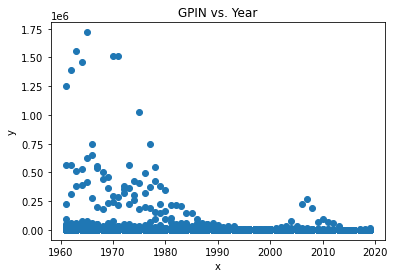

In [28]:
plt.scatter(gpin['year'],gpin['gpin'],)
plt.title('GPIN vs. Year')
plt.xlabel('x')
plt.ylabel('y')

### &#9989;&nbsp; Task 1.2.2 (2 points)
**Task:** *There is a problem with the scale of the data. A few points have extremely high values (>1,500,000) and most the points have much lower values. To better visualize the data, you need to transform it. 1) Create a new column in your dataframe that is the log10 value of `gpin` and 2) plot `log10(gpin)` vs. `year`.* 

In [29]:
#1
gpin['log10'] = np.log(gpin['gpin'])
gpin

C:\Users\krizm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,geo_area,item,year,gpin,log10
0,Colombia,Agave fibres nes,1961,109.17,4.692906
1,Cuba,Agave fibres nes,1961,315.01,5.752604
2,Ecuador,Agave fibres nes,1961,NaN,NaN
3,El Salvador,Agave fibres nes,1961,195.03,5.273153
4,Guatemala,Agave fibres nes,1961,418.99,6.037847
...,...,...,...,...,...
154575,Peru,Yautia (cocoyam),2019,89.49,4.494127
154576,Puerto Rico,Yautia (cocoyam),2019,43.99,3.783962
154577,Saint Lucia,Yautia (cocoyam),2019,71.71,4.272630
154578,Trinidad and Tobago,Yautia (cocoyam),2019,105.75,4.661078


Text(0, 0.5, 'y')

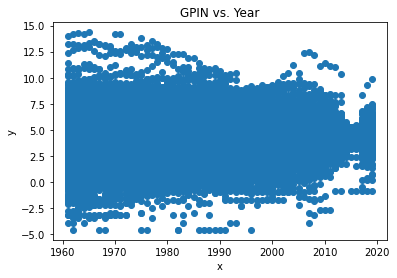

In [30]:
#2
plt.scatter(gpin['year'],gpin['log10'],)
plt.title('GPIN vs. Year')
plt.xlabel('x')
plt.ylabel('y')

### &#9989;&nbsp; Task 1.3  Better Data Visualization (2 points)
You may notice that with so many data points, it is hard to get a feel for how the data is distributed. This is sometimes referred to as "overplotting" meaning that there are so many data points on the plot, it is hard to discern any information about them. One way around this is to change the alpha level and also make the size of the points smaller.

**Task:** *Your task is to change the alpha level and point size of the plot you produced above. You should try different alpha levels and point sizes until you can see the structure of the data. When successful, you data should look like an hour glass: there is a wide spread (variability) of data before 2014-2016 that narrows as the years approach 2014-2016, and then the data spreads again after 2014-2016.*

**NOTE:** There is no right answer to this question and no visualization is perfect. Choose an alpha level and point size that ***you*** think reveals the structure of the data the best. The minimum alpha you can choose before the data disappears is 0.002.

Text(0, 0.5, 'log10')

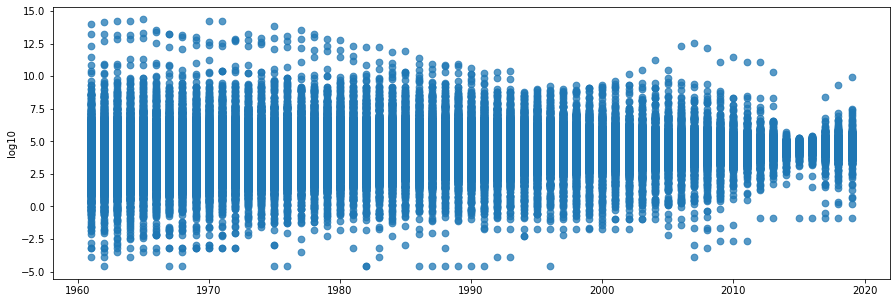

In [39]:
# Put your code here
plt.figure(figsize = (15,5))
plt.scatter(gpin['year'], gpin['log10'], 45, alpha=0.75)
plt.ylabel('log10')

### &#9989;&nbsp; Task 1.4 (4 points)
**Task:** *Examine your plot above.*

*1) Describe the distribution of Gross Production Index Number vs. year.*  
*2) How does adjusting alpha and point size affect what you see?*  
*3) Based on the description of how GPIN is calculated (as relative to the mean production of 2014-2016 set to 100) why do you think the data is distributed this way?*  
*4) How do you interpret the distribution of data before and after 2014-2016?*    

<font size=6 color="#009600">&#9998;</font> 1. The data follows a clear trend. The index numbers are similar general values, with the exception of a few outliers. 

2. Changing point size makes the ponts larger or smaller based off the value that is set. Changing alpha level changes the transparency of the lines to see the shape of the data. 

3. I think that the data is distrubuted this way because agriculture was more used in the past than it is now. Although agriculture is still in practice today, it not a large focus as it was in the past.

4. Before 2014-2016 the data is more heavily concentrated with less outliers in the data, but then after 2014-2016 the data is still concentrated, but within a smallter range. There are also relatively less outliers after 2014-2016. 

# Part 2: Data Filtering and Analysis

### Grading
* 2.1.1 (2 points)
* 2.1.2 (2 point)
* 2.1.3 (2 point)
* 2.2.1 (7 points)
* 2.2.2 (2 points)

## 2.1 Cleaning and Filtering

Additional cleaning and filtering may be required before you can analyze the data the way you want to. There are many ways to do this, but most involve "masking" the data in some way--removing everything from your data except the values that you want.

In the previous section, you took log10 of GPIN. Some of the GPIN values are 0, and taking the log10 of 0 is undefined. We need to remove the undefined `-inf` values and drop other `nan` values in the dataset to correctly analyze it.

Below is one strategy for removing undefined `-inf` and `inf` values by first converting them to `nan` values and then using the `.dropna()` function to remove the value:

In [9]:
### A Basic Example 
# see docs for .replace at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
# see docs for .dropna at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

# 1. In this example we first create an array with random numbers

n = 5
random_data = np.random.standard_normal(n) # generates 5 random data points

# 2. Then we add -inf and inf values to the array

random_data = np.append(random_data, [-np.inf,np.inf]) # add inf and -inf values
print(random_data) # print out to check random_data array, observe inf & -inf values

# 3. The array is converted to a dataframe

random_df = pd.DataFrame(random_data, columns=['data']) # convert array to pd.df

# 4. We use .replace to replace inf and -inf values with nan
# 5. And then drop the nan values

random_df_cleaned = random_df.replace([np.inf, -np.inf], np.nan) # replace inf, -inf with nan
random_df_cleaned = random_df_cleaned.dropna(subset=['data']) # drop nan

random_df_cleaned.describe() # check that inf and -inf values are removed in the dataframe

[-0.13470923  0.66015897  0.42257851  1.0082764   0.12467775        -inf
         inf]


,data
count,5.000000
mean,0.416196
std,0.446821
min,-0.134709
25%,0.124678
50%,0.422579
75%,0.660159
max,1.008276


### &#9989;&nbsp; Task 2.1.1 (2 points)

**Task:** *Create a new 'clean' dataframe with `-inf` values from taking the log10 of 0 removed. You can use the above example as a template. Print the outputs of `.describe()` of 1) the original dataframe and 2) the new 'clean' dataframe to demonstrate that the `-inf` values have been removed.*
<div class="alert alert-block alert-warning">

**IMPORTANT NOTE:** To be compatible with the rest of the homework (and to make use of hints to complete this assignment after this question!) please name your new 'clean' dataframe `gpin_data_cleaned`

In [32]:
# Put your pseudocode and code here
gpin_data_cleaned = gpin.replace([np.inf, -np.inf], np.nan)
gpin_data_cleaned = gpin_data_cleaned.dropna(subset=['log10'])
gpin_data_cleaned.describe()

,year,gpin,log10
count,141207.000000,1.412070e+05,141207.000000
mean,1991.195189,4.198946e+02,4.280437
std,16.984454,1.348914e+04,1.150664
min,1961.000000,1.000000e-02,-4.605170
25%,1977.000000,4.484000e+01,3.803101
50%,1992.000000,8.309000e+01,4.419924
75%,2006.000000,1.108000e+02,4.707727
max,2019.000000,1.719100e+06,14.357311


### &#9989;&nbsp; Task 2.1.2 (2 points)
The next task in this assignment will require you to do analysis on ***one*** `item` commodity. 

**Task:**

*1.  Create a new dataframe for the `item` commodity that you want to work with. The commodity must have >1,000 entries. Execute the cell below to choose a commodity with >1,000 entries to create a dataframe for.*

*2.  Check that you have successfully created a dataframe with only one commodity `item`.*

In [76]:
# Execute this cell for a list of items with >1,000 entries

gpin_data_cleaned['item'].value_counts().to_frame()[gpin_data_cleaned['item'].value_counts().to_frame()['item']>1000]

,item
"Eggs, hen, in shell",2124
"Meat indigenous, cattle",2124
"Meat indigenous, total",2124
"Roots and Tubers, Total",2124
Agriculture,2124
Livestock,2124
Crops,2124
Food,2124
"Meat indigenous, pig",2124
Vegetables and Fruit Primary,2124


In [81]:
avocados = gpin_data_cleaned[(gpin_data_cleaned.item== "Avocados")]
avocados

,geo_area,item,year,gpin,log10
92,Argentina,Avocados,1961,49.43,3.900558
94,Barbados,Avocados,1961,22.28,3.103689
95,Bolivia (Plurinational State of),Avocados,1961,12.36,2.514465
96,Brazil,Avocados,1961,46.36,3.836437
97,Chile,Avocados,1961,4.72,1.551809
...,...,...,...,...,...
152075,Puerto Rico,Avocados,2019,94.03,4.543614
152076,Saint Lucia,Avocados,2019,161.50,5.084505
152077,Trinidad and Tobago,Avocados,2019,108.30,4.684905
152078,United States of America,Avocados,2019,72.07,4.277638


In [82]:
len(avocados)

1603

In [83]:
avocados.describe()

,year,gpin,log10
count,1603.000000,1603.000000,1603.000000
mean,1990.152838,120.407598,4.252130
std,17.092273,167.338255,1.036607
min,1961.000000,1.350000,0.300105
25%,1975.000000,37.090000,3.613347
50%,1990.000000,78.650000,4.365008
75%,2005.000000,121.435000,4.799377
max,2019.000000,1446.940000,7.277206


### &#9989;&nbsp; Task 2.1.3 (2 points)
**Task:** *How many entries are in your cleaned dataframe? How do you know that your masking is working?*

<font size="+3">&#9998;</font> There are 1603 entries in the cleaned dataframe for watermelons. Some timesteps of the dataframe are missing (the infinities and the NaNs), so I know that the masking is working.

### &#9989;&nbsp; Task 2.2 Descriptive statistics (7 points)
One way to visualize the distribution of data is with one-dimensional histograms. 

**Task:**

*1.  Plot a one-dimensional histogram of totals for commodity you chose.*

*2.  For your commodity, calculate the mean of the total and plot them as a vertical lines on your histogram.*

*3.  Calculate the standard deviation and plot it as a vertical band about the mean.*

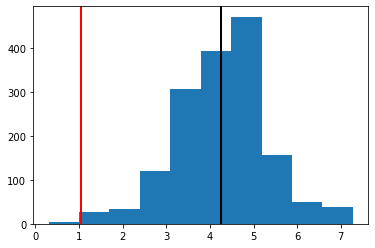

In [84]:
mean = np.mean(avocados['log10'])
std = np.std(avocados['log10'])
plt.hist(avocados['log10'])
plt.axvline(4.252130, color = 'black', linewidth = 2.0)
plt.axvline(1.036607, color = 'r', linewidth = 2.0)

### &#9989;&nbsp; Task 2.2.1 (2 points)

**Task:**

*What do you observe about the distribution of your commodity?*

*1. What does the standard deviation tell you about the distribution?*

*2. Remember that GPIN is relative to the mean production value from 2014-2016 set to 100, and that you have taken the log10 value of the data, where log10(100) = 2. What does it indicate if your mean is above or below the value of 2? That is, based on the mean value relative 2, do you think production of your commodity has historically been increasing or decreasing relative to 2014-2016?*

<font size=6 color="#009600">&#9998;</font> The graph of the watermelons gpin values is skewed left, and is not a normal distribution. The standard deviation shows how dispersed the data for watermelons is. I think that the commodity has historically been increasing until 2014-2016 where it has started to decrease. If the mean is above 2, I think it means that the commodity is increasing, and if it was less than 2 then the commodity is probably decreasing.

# Part 3: Putting it all Together

## 3.1 Speeding up/Automating the process

For the analysis of a single commodity you did above, you'll need the information you found in Part 2 for all commodities. 

### Grading
* 3.1.1 (2 points)
* 3.1.2 (3 points)
* 3.2.1 (4 points)
* 3.2.2 (4 points)

### &#9989;&nbsp; Task 3.1.1 Expanding to all commodities (2 points)

**Task 1 (1pt):** *Fix the code below to create a function for which the inputs are the overall dataframe (`frame`) and a commodity (`filter_key`) and the outputs are a dataframe containing data for just the selected commodity (`item_frame`).*

In [86]:
# Debug the function below
def item_dataframes(frame,filter_key): # inputs are the gpin_data_cleaned data frame and a commodity name
    mask = (filter_key==frame['item']) # this line of code creates a mask
    item_frame = frame[mask] # use the mask to create a new dataframe with just the selected commodity
    return item_frame # return the dataframe with just the selected commodity

item_dataframes(gpin_data_cleaned,'Avocados')

,geo_area,item,year,gpin,log10
92,Argentina,Avocados,1961,49.43,3.900558
94,Barbados,Avocados,1961,22.28,3.103689
95,Bolivia (Plurinational State of),Avocados,1961,12.36,2.514465
96,Brazil,Avocados,1961,46.36,3.836437
97,Chile,Avocados,1961,4.72,1.551809
...,...,...,...,...,...
152075,Puerto Rico,Avocados,2019,94.03,4.543614
152076,Saint Lucia,Avocados,2019,161.50,5.084505
152077,Trinidad and Tobago,Avocados,2019,108.30,4.684905
152078,United States of America,Avocados,2019,72.07,4.277638


**Task 2 (1pt):** *The code below loops through all the weight classes and store the dataframes for each weight class in a list (lists can store all types of variables including Pandas dataframes!). However, there are two bugs in the code! Fix the code below!*

In [87]:
# Debug the function below

item_list = list(gpin_data_cleaned['item'].unique()) # a list of commodities 

frame_list = [] # an empty list to store dataframes for each commodity

for itm in item_list: # for each commodity in the commodity list
    frame_list.append(pd.DataFrame(item_dataframes(gpin_data_cleaned,itm))) # use the item_dataframes function to create a df for each commodity and append


### &#9989;&nbsp; Task 3.1.2 Expanding statistics to all commodities (3 points)
We want the mean and standard deviation for each commodity. But we also want what the commodity is as well as how many geographical areas it is produced in.

**Task 1 (1pt):** *Write a function that calculates and returns the following for a dataframe representing a single commodity:*  

*1. Returns the `item` value of the commodity (hint: `df['item'].unique()[0]`)*  
*2. Returns the count of geographical areas represented (hint: `len(df['geo_area'].unique())`)*  
*3. Returns the mean and standard deviation of `log10(gpin)` for the single commodity selected*  

In [88]:
def function(df):
    item = df['item'].unique()[0]
    mean = np.mean(df['log10'])
    stdev = np.std(df['log10'])
    area = len(df['geo_area'].unique())
    return item, mean, stdev, area

**Task 2 (2pts):** *Then, write a loop through all of the dataframes for the commodity `items`. Save the commodity item name, the number of geographical areas it is produced in, the mean, and standard deviation for plotting in separate lists.*  

In [89]:
itemlist = []
meanlist = []
stdevlist = []
arealist = []

for i in frame_list:
    item, mean, stdev, area = function(i)
    itemlist.append(item)
    meanlist.append(mean)
    stdevlist.append(stdev)
    arealist.append(area)
print(meanlist)

[4.896773496231242, 4.24294981804766, 3.7251903260250265, 3.623509689188643, 4.292121848282985, 4.925912007165179, 3.9457213315996813, 4.055235488219016, 4.25213038442368, 4.349463519489349, 4.663146226850516, 4.967008092789574, 4.3365671681520155, 4.248460379300768, 4.490375323075984, 4.025453613343921, 2.7865259342948288, 4.035398166782082, 4.455136776511565, 4.993228080335114, 4.17052909758515, 5.442264279973057, 3.9792375416628416, 4.522460088343773, 4.23903578401621, 4.39960130711839, 4.7244722065871905, 3.7730698877184667, 4.1970044753178035, 4.289321471843276, 4.3274597586478905, 4.883958500187014, 5.275906283262818, 3.9773191801038994, 3.756199670826204, 4.297080678268706, 4.606223956872807, 4.975418326809843, 4.581180155115428, 2.6498611111211052, 4.281721969674428, 3.982732496349037, 4.254430969335414, 3.8456944716708468, 4.010239511063291, 3.6608921516863338, 4.289338915855153, 4.967207083779527, 4.21814540913775, 4.214867006807557, 4.243900122218083, 4.064580927101777, 4.21

## 3.2 Testing hypotheses

Now that you have calculated statistics for each commodity, you are interested in testing hypotheses. You have the following ideas that you would like to test:

1.  Is mean log10(gpin) correlated with the number of countries a commodity is produced in?  
2.  Is the production of commodities that are produced in a large number of countries more historically stable than production of commodities in a smaller number of countries? That is, is the standard deviation of log10(gpin) correlated with number of countries it is produced in.

You decide to make a plot to visualize your data and test these hypotheses!

### &#9989;&nbsp; Task 3.2.1 Plotting mean log10(gpin) and standard deviation log10(gpin) vs number of producing countries (4 points)

**Task:** *Using the lists above, make the following plots:*  

1) For all commodities, plot the mean log10(gpin) value vs. the number of countries it is produced in (2pts);  

2) For all commodities, plot the standard deviation of the log10(gpin) vs. the number of countries (2pts). 

Be sure to label x and y axes and provide a plot title for each.

Text(0.5, 1.0, 'area vs. mean')

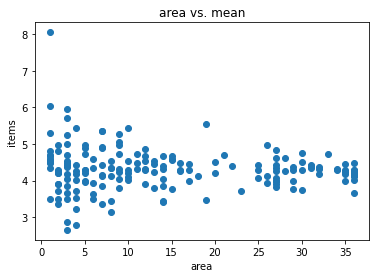

In [90]:
plt.scatter(arealist,meanlist)
plt.xlabel('area')
plt.ylabel('items')
plt.title('area vs. mean')

Text(0.5, 1.0, 'area vs. standard deviation')

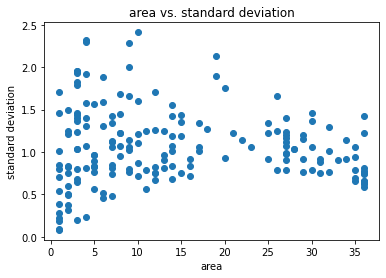

In [91]:
plt.scatter(arealist,stdevlist)
plt.xlabel('area')
plt.ylabel('standard deviation')
plt.title('area vs. standard deviation')

### &#9989;&nbsp; Task 3.2.2 Interpreting plots and drawing conclusions (4 pts)
<div class="alert alert-block alert-warning">

**IMPORTANT NOTE:** 
For the tasks below, remember that negative results in science are common! For one or both of your plots, there may be or may not be correlation. It is OK to say that you think the data supports or does not support the hypotheses for each of the questions! The important thing is that you 1) understand the statistics as they apply to the data and 2) do not misinterpret what your plots show above.

**Task 1 (2pts):** Based on your plot above, do you believe that mean log10(gpin) correlates with the number of countries a commodity is produced in (1pt)? Based on your answer, does the number of countries a commodity is produced in influence whether its production has historically increased or decreased (1pt)?

<font size=6 color="#009600">&#9998;</font> Yes I do think that log10(gpin) correlates with the number of countries a commodity is produced in because the data is more saturated in the places where there is less area producing avocados.
2. Yes, I think it does because the higher the demand, the higher the production. So if there are fewer countries growing the commodity, the demand will increase and therefore countries will try to increase production of the commidity in return.

**Task 2 (2pts):** Based on your plot above, do you believe the production of commodities that are produced in a large number of countries is more historically stable than production of commodities in a smaller number of countries, as measured using standard deviation? (1pt)? Based on your answer, do you think that the number of countries a crop is produced in predicts if it will be more resilient to climate change in the future (1pt)?

<font size=6 color="#009600">&#9998;</font> The smaller number of countries has more variation and larger standard deviation values, so the commodities are more stable in countries that produce in more locations. If a crop is planted in an increased number of locations then it will be more resistant to different types of climate due to the fact that it is already growing in various different environment.

# Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it! 